In [142]:
# 1.Import and preprocess the dataset.

In [143]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [144]:
df = pd.read_csv('Housing.csv')

In [145]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [146]:
df.shape

(545, 13)

In [147]:
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [148]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [149]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [150]:
# Feature Selection
X = df_encoded.drop("price", axis = 1) # input feature
y = df_encoded["price"] # target feature

In [151]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [152]:
print("Feature matrix shape (X):", X_scaled.shape)
print("Target vector shape (y):", y.shape)

Feature matrix shape (X): (545, 13)
Target vector shape (y): (545,)


In [153]:
# Split data into train-test sets

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [155]:
# 3.Fit a Linear Regression model using sklearn.linear_model.

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [157]:
# make prediciton
y_pred = model.predict(X_test)

In [158]:
for i in range(5):
    print(f"Predicted: {round(y_pred[i]):,.0f} | Actual: {y_test.iloc[i]:,.0f}")

Predicted: 5,164,654 | Actual: 4,060,000
Predicted: 7,224,722 | Actual: 6,650,000
Predicted: 3,109,863 | Actual: 3,710,000
Predicted: 4,612,075 | Actual: 6,440,000
Predicted: 3,294,646 | Actual: 2,800,000


In [171]:
# now if i give a new data, how will it predict the price of house

In [172]:
nd = pd.read_csv("New Data.csv")
nd

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2650,3,1,2,yes,no,yes,no,no,1,no,no,yes


In [173]:
# One-hot encode categorical columns
df_encod = pd.get_dummies(nd)

In [174]:
df_encod

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_no,basement_yes,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished_no,furnishingstatus_unfurnished_yes
0,2650,3,1,2,1,True,True,True,True,True,True,True,True


In [175]:
#  Scale it (use the same scaler as training)
new_data_scaled = scaler.fit_transform(df_encod)

In [176]:
predicted_value = model.predict(new_data_scaled)

In [177]:
print(round(predicted_value[0]))

4737518


In [183]:
# 4. Evaluate model using MAE, MSE, R²

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Evaluation:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R²) Score:", round(r2, 4))


Model Evaluation:
Mean Absolute Error (MAE): 970043.4
Mean Squared Error (MSE): 1754318687330.67
R-squared (R²) Score: 0.6529


In [184]:
# 5. Plot regression line and interpret coefficients.

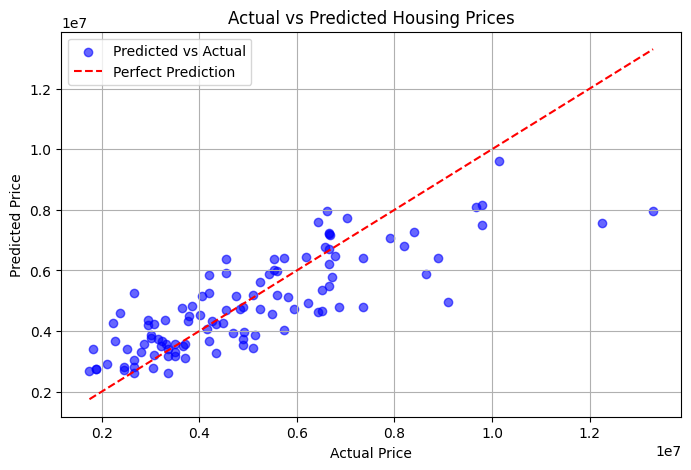

In [179]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()


In [180]:
# Get feature names from the encoded DataFrame
feature_names = X.columns

# Print each feature’s weight (coefficient)
print("Model Coefficients:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")


Model Coefficients:
area: 511615.5638
bedrooms: 56615.5725
bathrooms: 549420.5012
stories: 353158.4299
parking: 193542.7817
mainroad_yes: 128151.9213
guestroom_yes: 88590.2135
basement_yes: 186194.1505
hotwaterheating_yes: 143233.2062
airconditioning_yes: 367817.8949
prefarea_yes: 267018.6608
furnishingstatus_semi-furnished: -62550.2972
furnishingstatus_unfurnished: -193987.7811
